In [160]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, SpectralClustering, AffinityPropagation
from sklearn import metrics
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [20]:
df = pd.read_csv('boston14.csv')
print(df.shape)
df.head()

(31984, 21)


,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [21]:
#How many unique divisions are there?
print(df['division'].nunique())
print(df['genderdiv'].nunique())


6979
17575


In [23]:
df['ctz'].unique() #citizenship

array([nan, 'KOR', 'MEX', 'ECU', 'CPV', 'AUS', 'CAN', 'NZL', 'ROU', 'GER',
       'DEN', 'GBR', 'FRA', 'IRL', 'JPN', 'RSA', 'ITA', 'GUA', 'ESP',
       'CHN', 'LAT', 'ARG', 'TUR', 'BRA', 'KEN', 'CRC', 'RUS', 'NED',
       'USA', 'BIH', 'PHI', 'SUI', 'SRI', 'MAR', 'SWE', 'SVK', 'VEN',
       'HUN', 'NEP', 'IND', 'PER', 'GEO', 'DOM', 'CMR', 'COL', 'NOR',
       'TRI', 'AUT', 'KSA', 'TPE', 'HKG', 'ERI', 'SLO', 'PAR', 'CZE',
       'ZIM', 'UKR', 'BEL', 'POR', 'MLT', 'MAS', 'FIN', 'ALG', 'IRI',
       'NCA', 'ETH', 'ISR', 'ISL', 'CHI', 'ESA', 'BLR', 'SIN', 'HAI',
       'POL', 'GUY', 'GRE', 'IRQ', 'BER', 'PAK', 'URU', 'UGA', 'CRO',
       'PAN', 'BAR', 'LIB'], dtype=object)

In [24]:
df['country'].unique() # Country of residence

array(['JPN', 'KEN', 'RSA', 'ETH', 'SUI', 'USA', 'FRA', 'CAN', 'ESP',
       'POL', 'RUS', 'BLR', 'MAR', 'UKR', 'BRA', 'THA', 'CHN', 'ITA',
       'GER', 'GBR', 'AUS', 'SWE', 'GRE', 'SLO', 'IRL', 'KOR', 'ARG',
       'COL', 'NED', 'ISR', 'CZE', 'NOR', 'AUT', 'CRC', 'MEX', 'GUA',
       'SIN', 'DEN', 'HUN', 'BEL', 'FIN', 'CHI', 'ISL', 'VEN', 'DOM',
       'PER', 'HKG', 'SVK', 'NZL', 'TPE', 'PHI', 'CAY', 'POR', 'UAE',
       'IND', 'PAN', 'ROU', 'LUX', 'ESA', 'TRI', 'MAS', 'VGB', 'EGY',
       'BRN', 'EST', 'ECU', 'LIE', 'TUR', 'BOL', 'BAR', 'URU', 'QAT',
       'INA', 'BER', 'TAN', 'BAH', 'CRO', 'ZIM'], dtype=object)

In [25]:
df['state'].unique()

array([nan, 'CA', 'ON', 'MI', 'QC', 'IL', 'OR', 'AZ', 'CO', 'VA', 'GA',
       'NJ', 'ME', 'MA', 'UT', 'NY', 'MO', 'RI', 'NH', 'MT', 'KY', 'FL',
       'TN', 'AB', 'WA', 'WI', 'DC', 'PA', 'OH', 'IN', 'NS', 'MD', 'IA',
       'MN', 'CT', 'SD', 'TX', 'DE', 'LA', 'NC', 'OK', 'NV', 'AL', 'KS',
       'NE', 'MB', 'HI', 'AK', 'NM', 'BC', 'VT', 'ID', 'SC', 'WV', 'PE',
       'ND', 'MS', 'AR', 'SK', 'NT', 'PR', 'WY', 'NB', 'YT', 'NL', 'AE',
       'AA', 'AP', 'GU'], dtype=object)

In [26]:
#We have a data issue here, many of the numeric types have some string values
df.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

In [27]:
#Drop missing time data and change to float type, tracking how many rows are lost
for col in ['5k','10k','20k','half','25k','30k','35k','40k']:
    df = df[df[col]!='-']
    df[col] = df[col].astype('float')
    print(df.shape)

(31932, 21)
(31914, 21)
(31894, 21)
(31854, 21)
(31679, 21)
(31669, 21)
(31655, 21)
(31649, 21)


In [28]:
#All the Time tracking attributes are VERY correlated
df.corr()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
10k,1.000000,0.475172,0.973714,0.168658,0.925291,0.801329,0.943640,0.907153,0.925290,0.959731,0.990872,0.984986,0.986353,0.929413
division,0.475172,1.000000,0.496968,-0.576451,0.519383,0.471173,0.515269,0.514791,0.519413,0.505915,0.473961,0.487076,0.486645,0.521891
25k,0.973714,0.496968,1.000000,0.159475,0.968168,0.826229,0.984400,0.928506,0.968173,0.995406,0.951377,0.995917,0.995088,0.972147
age,0.168658,-0.576451,0.159475,1.000000,0.167319,0.307467,0.158180,0.201185,0.167300,0.157736,0.159966,0.165972,0.165471,0.161233
official,0.925291,0.519383,0.968168,0.167319,1.000000,0.882599,0.993007,0.959718,0.999994,0.981220,0.902963,0.956504,0.954395,0.999293
genderdiv,0.801329,0.471173,0.826229,0.307467,0.882599,1.000000,0.860217,0.908184,0.882605,0.841520,0.789251,0.817770,0.815914,0.877441
35k,0.943640,0.515269,0.984400,0.158180,0.993007,0.860217,1.000000,0.949005,0.993011,0.993964,0.920547,0.974071,0.972244,0.995451
overall,0.907153,0.514791,0.928506,0.201185,0.959718,0.908184,0.949005,1.000000,0.959736,0.937995,0.893247,0.922732,0.921453,0.957724
pace,0.925290,0.519413,0.968173,0.167300,0.999994,0.882605,0.993011,0.959736,1.000000,0.981226,0.902956,0.956508,0.954398,0.999290
30k,0.959731,0.505915,0.995406,0.157736,0.981220,0.841520,0.993964,0.937995,0.981226,1.000000,0.936346,0.987553,0.986107,0.984647


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31649 entries, 0 to 31983
Data columns (total 21 columns):
10k          31649 non-null float64
name         31649 non-null object
division     31649 non-null int64
25k          31649 non-null float64
gender       31649 non-null object
age          31649 non-null int64
official     31649 non-null float64
bib          31649 non-null object
genderdiv    31649 non-null int64
ctz          1238 non-null object
35k          31649 non-null float64
overall      31649 non-null int64
pace         31649 non-null float64
state        29103 non-null object
30k          31649 non-null float64
5k           31649 non-null float64
half         31649 non-null float64
20k          31649 non-null float64
country      31649 non-null object
city         31648 non-null object
40k          31649 non-null float64
dtypes: float64(10), int64(4), object(7)
memory usage: 4.5+ MB


In [30]:
#Based on the above, I will drop citizenship and State, which are unlikely to add anything anyway.
#I will also drop string categorical, but will leave numeric categorical for now.
df = df.drop(['ctz','state','name', 'bib','country','city'],axis=1)
df['gender'] = np.where(df.gender =='M',1,0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31649 entries, 0 to 31983
Data columns (total 15 columns):
10k          31649 non-null float64
division     31649 non-null int64
25k          31649 non-null float64
gender       31649 non-null int32
age          31649 non-null int64
official     31649 non-null float64
genderdiv    31649 non-null int64
35k          31649 non-null float64
overall      31649 non-null int64
pace         31649 non-null float64
30k          31649 non-null float64
5k           31649 non-null float64
half         31649 non-null float64
20k          31649 non-null float64
40k          31649 non-null float64
dtypes: float64(10), int32(1), int64(4)
memory usage: 3.7 MB


# Choose Features

In [31]:
#Reorder columns intuitively
ordercols = ['age','gender','division', 'genderdiv','overall','pace','5k','10k',
            '20k','half','25k','30k','35k','40k','official']
df = df[ordercols]
df.head(5)

,age,gender,division,genderdiv,overall,pace,5k,10k,20k,half,25k,30k,35k,40k,official
0,47,1,8,8,8,3.27,8.02,17.37,37.65,39.72,47.67,59.18,71.40,80.43,85.25
1,33,0,1,1,21,5.30,16.22,32.58,65.83,69.47,82.43,99.33,116.37,132.10,138.95
2,41,1,1,1,1,3.08,7.75,16.62,36.10,38.03,45.80,56.45,67.42,76.10,80.60
3,24,0,3,3,27,5.37,16.20,32.57,65.83,69.47,82.43,99.33,116.37,132.95,140.58
4,40,1,2,2,2,3.10,8.02,17.12,36.58,38.60,46.37,57.03,67.83,76.72,81.23


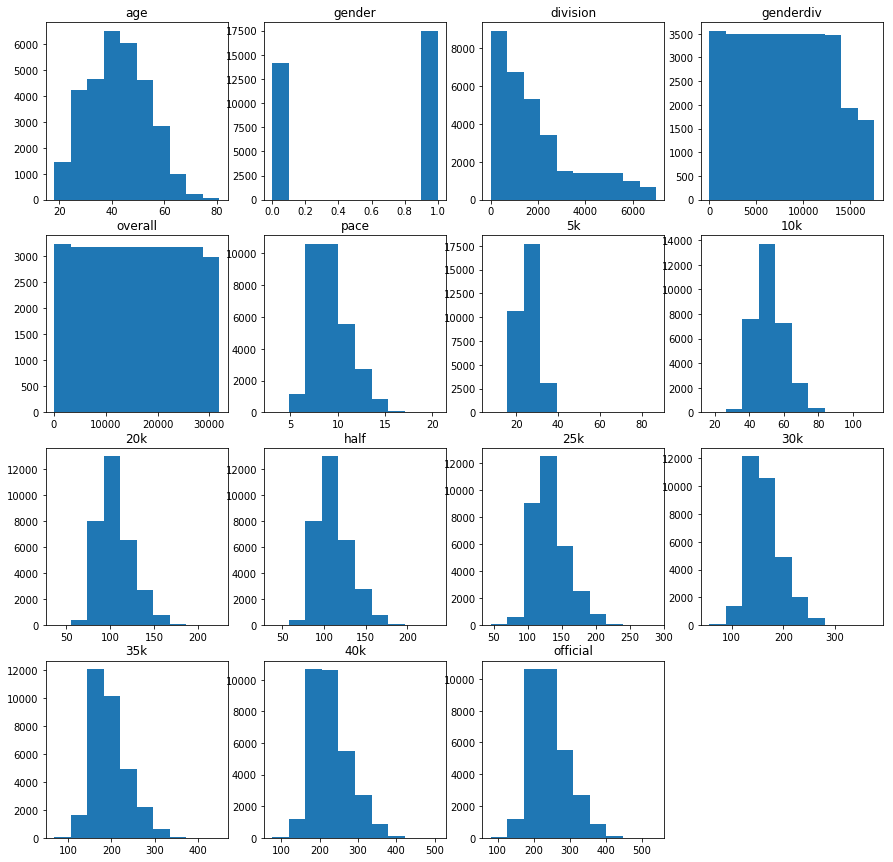

In [33]:
#View distributions
plt.figure(figsize=[15,15])
for i,col in enumerate(ordercols):
    plt.subplot(4,4,i+1)
    plt.hist(df[col])
    plt.title(col)
plt.show()

In [34]:
#Function takes a list of features and plots the first 
#2 Components created by PCA, with labels
def chart2comp(x, labels):
    xnorm = normalize(x)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(xnorm)
    print(pca.explained_variance_ratio_[:2])
    plt.scatter([i[0] for i in X_pca],[i[1] for i in X_pca], c=labels)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

[0.55724116 0.27768642]


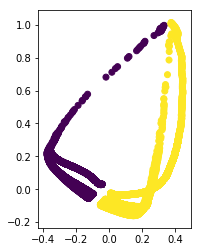

In [35]:
chart2comp(df,df.gender)

[0.97553146 0.02405211]


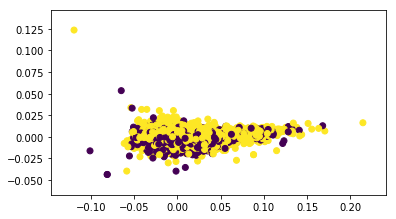

In [36]:
chart2comp(df[['5k','half', 'official']],df.gender)

# Can we differentiate people who start too fast from those who start with smarter pacing?


In [42]:
#Take a sample of 500 rows and do spectral clustering
#I'm starting there because I'm not optimistic that the clusters will
#be of similar shape/variance due to the above graphs

#features will be the first time measurement (5K), half, and full

x = df[['5k','half', 'official']].sample(500)
xnm = pd.DataFrame(normalize(x), columns=x.columns)

n_clusters=5

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(xnm)

#Predicted clusters.
predict=sc.fit_predict(xnm)
x['spectral_3label'] = sc.labels_
x.groupby('spectral_3label').agg(['count','mean','std'])

5k                       half                         \
                count       mean       std count        mean        std   
spectral_3label                                                           
0                 127  26.096299  3.516164   127  113.565197  16.555392   
1                 300  24.948600  3.603421   300  105.744300  15.542067   
2                   1  23.970000       NaN     1  103.600000        NaN   
3                   1  20.800000       NaN     1   89.730000        NaN   
4                  71  28.963521  5.700954    71  133.567746  28.581819   

                official                         
                   count        mean        std  
spectral_3label                                  
0                    127  265.216299  44.559315  
1                    300  221.815200  34.425895  
2                      1  223.950000        NaN  
3                      1  194.330000        NaN  
4                     71  291.464930  65.789629

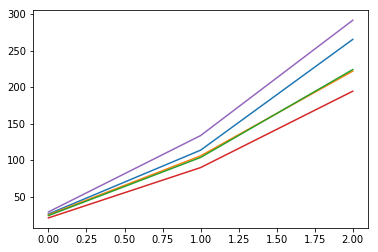

In [43]:
#If there were interesting info here, we'd see these lines crossing, implying that 
#some clusters started too fast and slowed down later.

for i in range(n_clusters):
    plt.plot([x[x.spectral_3label==i][_].mean() for _ in x.columns[:3]])
plt.show()

In [44]:
#There are not more than 3 meaningful clusters in this, let's do 3
x = df[['5k','half', 'official']].sample(500)
xnm = pd.DataFrame(normalize(x), columns=x.columns)

n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(xnm)

#Predicted clusters.
predict=sc.fit_predict(xnm)
x['spectral_3label'] = sc.labels_
x.groupby('spectral_3label').agg(['count','mean','std'])

5k                       half                         \
                count       mean       std count        mean        std   
spectral_3label                                                           
0                 271  24.182288  3.478705   271  102.506679  14.726778   
1                  94  28.431170  5.351346    94  130.378085  24.993533   
2                 135  26.219481  3.994055   135  113.095704  17.687628   

                official                         
                   count        mean        std  
spectral_3label                                  
0                    271  214.068303  32.553561  
1                     94  289.025957  58.747852  
2                    135  261.858000  43.624229

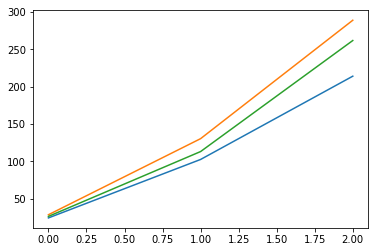

In [45]:
for i in range(n_clusters):
    plt.plot([x[x.spectral_3label==i][_].mean() for _ in x.columns[:3]])
plt.show()

[0.97881902 0.02072504]


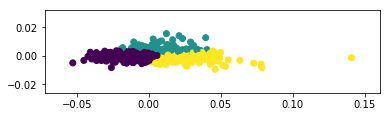

[0.97375062 0.02593723]


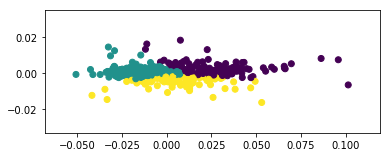

[0.97549374 0.02424889]


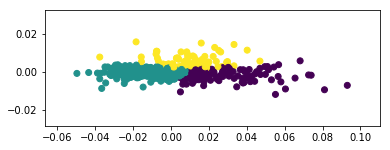

[0.97894503 0.02073812]


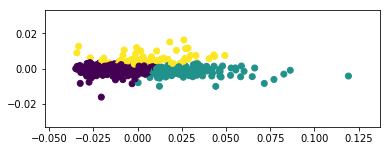

[0.97788265 0.02179544]


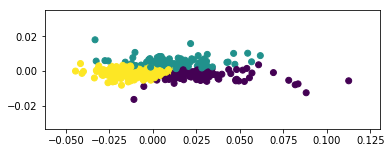

In [47]:
#Let's at least see if the 3 clusters are consistent:

for i in range (5):
    x = df[['5k','half', 'official']].sample(500)
    xnm = pd.DataFrame(normalize(x), columns=x.columns)
    sc.fit(xnm)
    #Predicted clusters.
    predict=sc.fit_predict(xnm)
    chart2comp(x,sc.labels_)

There does not seem to be meaningful clusters we can find besides fast vs. slow using just times.

# Since the time markers are all so correlated and don't seem to create different clusters besides fast/slow, I'm going to reduce dimensions

In [145]:
#We could either use PCA, average all the time columns, or just select whichever is best

In [59]:
#PCA to reduce Dimensionality
timecols = df.loc[:,['5k','10k','20k','half','25k','30k','35k','40k','official']]
pca = PCA(n_components=1)
df['pca_times'] = pca.fit_transform(timecols)
print(pca.explained_variance_ratio_[0]) 


0.9873900295467857


In [60]:
#Averaged to reduce Dimensionality:
df['avgd_times'] = timecols.mean(axis=1)

# Which dimensionality reduction technique gives the best kmeans score? PCA, averaging the columns, or any of the indivuals columns?

In [63]:
#these are the columns we want to chose from
timefeats = ['5k','10k','20k','half','25k','30k','35k','40k','official', 'pca_times', 'avgd_times']

#This is a list of lists, where each sublist is a set of
#features to try
feat_combos = [['age', 'gender', _] for _ in timefeats]


In [70]:
#Loop through the feature combinations, scoring each one using kmeans
for feats in feat_combos:
    print("Features: {}".format(feats))
    for clusters in range(2,6):
        model = KMeans(n_clusters=clusters)
        x = df[feats].sample(10000)
        xnm = normalize(x)
        model.fit(xnm)
        labels = model.labels_
        print(clusters, metrics.silhouette_score(xnm, labels, metric='euclidean'))

Features: ['age', 'gender', '5k']
2 0.6119509337794495
3 0.5464854934830312
4 0.5227915215558063
5 0.4990673338288615
Features: ['age', 'gender', '10k']
2 0.5912305209749469
3 0.5458536591724596
4 0.5191188489656201
5 0.5095940339948808
Features: ['age', 'gender', '20k']
2 0.5847952683999962
3 0.5431900201002244
4 0.5249644219198208
5 0.5117854206119505
Features: ['age', 'gender', 'half']
2 0.5845541932043329
3 0.5447876549513289
4 0.5250820646878301
5 0.5124054352464029
Features: ['age', 'gender', '25k']
2 0.577860320426247
3 0.5445208410629524
4 0.5258071292047636
5 0.513247900578604
Features: ['age', 'gender', '30k']
2 0.5802856649140533
3 0.5404853965882099
4 0.5196475617945242
5 0.5109417153033485
Features: ['age', 'gender', '35k']
2 0.5737687357075516
3 0.5422462983520734
4 0.5243443238069457
5 0.5118345972173993
Features: ['age', 'gender', '40k']
2 0.5724502956507883
3 0.5348157971924306
4 0.5234659528594748
5 0.5097542383534245
Features: ['age', 'gender', 'official']
2 0.568797

# PCA has scored better on KMEANS, and 2 clusters appears to be best in most cases. Let's examine them:

In [157]:
#silence irrelevant pandas warning
pd.options.mode.chained_assignment = None

model = KMeans(n_clusters=2)
x = df[['age', 'gender', 'pca_times']]
xnm = normalize(x)
model.fit(xnm)
x['labels'] = model.labels_


x['realtime'] = df.loc[:,'official']
x.groupby('labels').agg({
    'age': ['count', 'mean', 'std'],
    'gender': 'sum',
    'realtime': ['mean', 'std']
})

age                       gender    realtime           
        count       mean        std    sum        mean        std
labels                                                           
0       18449  40.988780  10.140194  11476  207.257013  22.363840
1       13200  44.336591  12.486397   6008  290.444418  38.273342

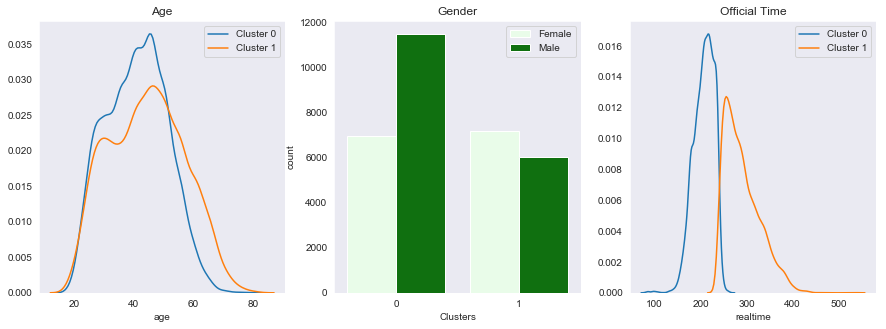

In [161]:
#Examine the output
plt.figure(figsize=[15,5])
plt.subplot(131)
sns.distplot(x[x.labels==0]['age'], hist=False, label='Cluster 0')
sns.distplot(x[x.labels==1]['age'], hist=False, label='Cluster 1')
plt.title('Age')
plt.legend()

plt.subplot(132)
sns.countplot(x.labels, hue=x.gender, color='green')
plt.legend(['Female', 'Male'])
plt.xlabel('Clusters')
plt.title('Gender')

plt.subplot(133)
sns.distplot(x[x.labels==0]['realtime'], hist=False, label='Cluster 0')
sns.distplot(x[x.labels==1]['realtime'], hist=False, label='Cluster 1')
plt.title('Official Time')
plt.legend()
plt.show()

In [162]:
#Interesting. Now trying 3 Clusters:

In [163]:
model = KMeans(n_clusters=3)
x = df[['age', 'gender', 'pca_times']]
xnm = normalize(x)
model.fit(xnm)
x['labels'] = model.labels_
x['realtime'] = df.official
x.groupby('labels').agg({
    'age': ['count', 'mean', 'std'],
    'gender': 'sum',
    'realtime': ['mean', 'std']
})

age                       gender    realtime           
        count       mean        std    sum        mean        std
labels                                                           
0       14660  39.347749   9.609488   9733  200.306271  19.609523
1        6574  47.834347  10.135253   3000  240.639255   9.956804
2       10415  43.220739  12.680089   4751  301.401687  35.701896

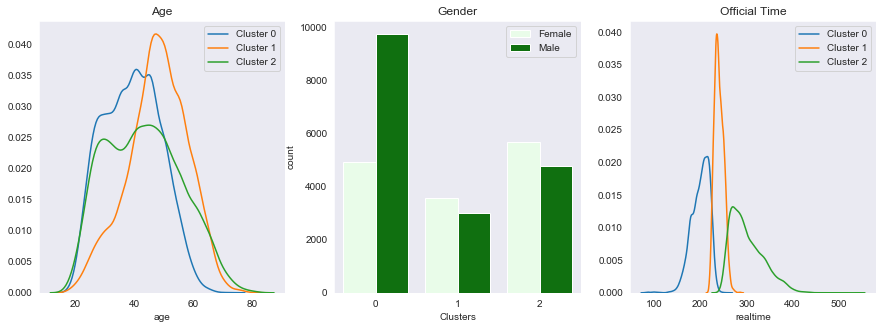

In [164]:
plt.figure(figsize=[15,5])
plt.subplot(131)
sns.distplot(x[x.labels==0]['age'], hist=False, label='Cluster 0')
sns.distplot(x[x.labels==1]['age'], hist=False, label='Cluster 1')
sns.distplot(x[x.labels==2]['age'], hist=False, label='Cluster 2')
plt.title('Age')
plt.legend()

plt.subplot(132)
sns.countplot(x.labels, hue=x.gender, color='green')
plt.legend(['Female', 'Male'])
plt.xlabel('Clusters')
plt.title('Gender')

plt.subplot(133)
sns.distplot(x[x.labels==0]['realtime'], hist=False, label='Cluster 0')
sns.distplot(x[x.labels==1]['realtime'], hist=False, label='Cluster 1')
sns.distplot(x[x.labels==2]['realtime'], hist=False, label='Cluster 2')
plt.title('Official Time')
plt.legend()
plt.show()

In [165]:
#Trying MeansShift
#Test for consistency
for i in range(5):
    x = df[['age', 'gender', 'pca_times']].sample(10000)
    xnm = normalize(x)
    model = MeanShift(bandwidth=.25, bin_seeding=True)
    model.fit(xnm)
    labels = model.labels_
    n_clusters_ = len(np.unique(labels))
    print("Number of estimated clusters: {}".format(n_clusters_)) 
    print(metrics.silhouette_score(x, labels, metric='euclidean'))

Number of estimated clusters: 3
0.4134903470688253
Number of estimated clusters: 2
0.5574424346825383
Number of estimated clusters: 2
0.5540322936021073
Number of estimated clusters: 2
0.5610418393662351
Number of estimated clusters: 2
0.5623304022056804


In [166]:
x = df[['age', 'gender', 'pca_times']]
xnm = normalize(x)
model = MeanShift(bandwidth=.20, bin_seeding=True)
model.fit(xnm)
x['labels'] = model.labels_
x['realtime'] = df.official
x.groupby('labels').agg({
    'age': ['count', 'mean', 'std'],
    'gender': 'sum',
    'realtime': ['mean', 'std']
})

age                       gender    realtime           
        count       mean        std    sum        mean        std
labels                                                           
0       15143  39.574325   9.688737   9959  201.177998  19.900832
1        9074  42.437955  12.667020   4133  307.235361  34.501535
2        7432  48.047497  10.413573   3392  245.325467  12.051379

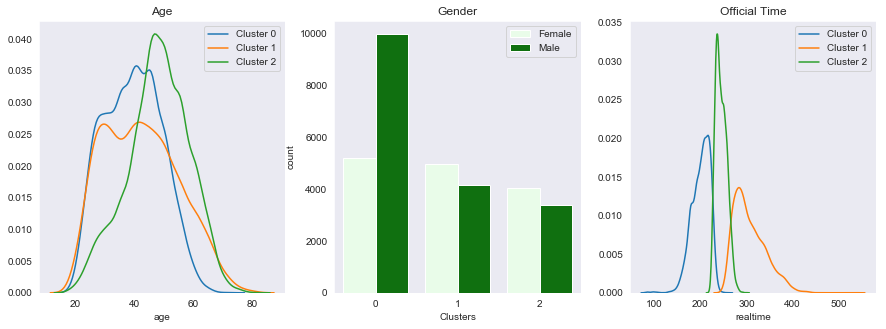

In [167]:
plt.figure(figsize=[15,5])
plt.subplot(131)
sns.distplot(x[x.labels==0]['age'], hist=False, label='Cluster 0')
sns.distplot(x[x.labels==1]['age'], hist=False, label='Cluster 1')
sns.distplot(x[x.labels==2]['age'], hist=False, label='Cluster 2')
plt.title('Age')
plt.legend()

plt.subplot(132)
sns.countplot(x.labels, hue=x.gender, color='green')
plt.legend(['Female', 'Male'])
plt.xlabel('Clusters')
plt.title('Gender')

plt.subplot(133)
sns.distplot(x[x.labels==0]['realtime'], hist=False, label='Cluster 0')
sns.distplot(x[x.labels==1]['realtime'], hist=False, label='Cluster 1')
sns.distplot(x[x.labels==2]['realtime'], hist=False, label='Cluster 2')
plt.title('Official Time')
plt.legend()
plt.show()

# MeansShift is getting remarkably similar results to k-means
To mix things up, I'm going to pass Spectral 4 clusters and see if we get any new insights.

In [195]:
x = df[['age', 'gender', 'pca_times']].sample(1000)
xnm = normalize(x)
model = SpectralClustering(n_clusters=4)
model.fit(xnm)
x['labels'] = model.labels_
x['realtime'] = df.official
x.groupby('labels').agg({
    'age': ['count', 'mean', 'std'],
    'gender': 'sum',
    'realtime': ['mean', 'std']
})

age                       gender    realtime           
       count       mean        std    sum        mean        std
labels                                                          
0        211  40.336493  12.708660     92  317.441564  33.851435
1        271  45.579336   9.169604    135  226.348635   9.860076
2        206  47.131068  11.030658     90  259.907961  13.711016
3        312  37.977564   8.663195    227  192.140000  18.104896

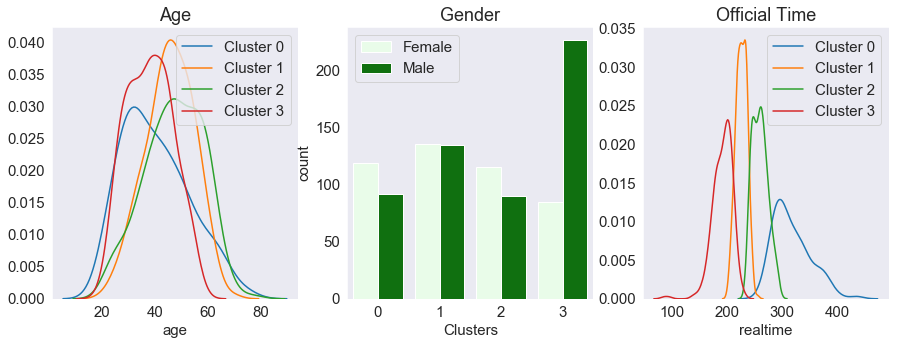

In [196]:
plt.figure(figsize=[15,5])
plt.subplot(131)
sns.distplot(x[x.labels==0]['age'], hist=False, label='Cluster 0')
sns.distplot(x[x.labels==1]['age'], hist=False, label='Cluster 1')
sns.distplot(x[x.labels==2]['age'], hist=False, label='Cluster 2')
sns.distplot(x[x.labels==3]['age'], hist=False, label='Cluster 3')
plt.title('Age')
plt.legend()

plt.subplot(132)
sns.countplot(x.labels, hue=x.gender, color='green')
plt.legend(['Female', 'Male'])
plt.xlabel('Clusters')
plt.title('Gender')

plt.subplot(133)
sns.distplot(x[x.labels==0]['realtime'], hist=False, label='Cluster 0')
sns.distplot(x[x.labels==1]['realtime'], hist=False, label='Cluster 1')
sns.distplot(x[x.labels==2]['realtime'], hist=False, label='Cluster 2')
sns.distplot(x[x.labels==3]['realtime'], hist=False, label='Cluster 3')
plt.title('Official Time')
plt.legend()
plt.show()

# Analysis
The best spacer is any of the time measurements; whether the models produce 2,3, or 4 clusters, the official time is clearly deliniated, as seen in the above far right histograms. The other features are clustered to the extent that they are correlated with finish times; The fastest cluster is very male, the slowest cluster is more female than male, and the middle group(s) are typically roughly equal. Similarly, the faster group(s) tend to be younger. 

Forcing a fourth cluster simply splits up that slowest cluster of finishers in the race, which I think it meaningful, so I'm keeping it for the final grouping shown below:

In [197]:
#for convenient legend labeling
x['gender'] = np.where(x.gender==1,'Male', 'Female')

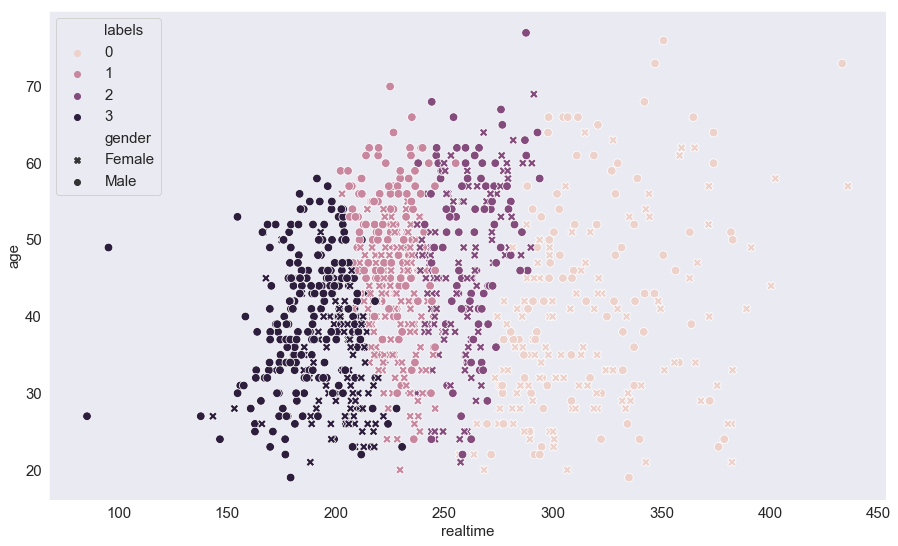

In [202]:
plt.figure(figsize=(15,9))
plt.rcParams.update({'font.size': 15})
sns.set_style("dark")

sns.scatterplot(x='realtime',y='age',hue='labels',style='gender',data=x, markers=['X','o'], s=75)
plt.show()